In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_size = 200
for i in range(1, 100):
    page = requests.get(f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}")
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 17
Error on page 18
Error on page 18
Error on page 19
Error on page 19


In [3]:
len(reviews)

3903

In [4]:
len(stars)

4002

In [5]:
len(date)

3903

In [6]:
#check the length 
stars = stars[:len(reviews)]

In [7]:
len(country)

3903

In [8]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [9]:
df

,reviews,stars,date,country
0,✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,17th December 2024,United Kingdom
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1,17th December 2024,Australia
2,✅ Trip Verified | This was the first time I ...,1,14th December 2024,United States
3,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom
4,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom
...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,29th August 2012,United Kingdom
3899,LHR to HAM. Purser addresses all club passenge...,5,28th August 2012,United Kingdom
3900,My son who had worked for British Airways urge...,8,12th October 2011,United Kingdom
3901,London City-New York JFK via Shannon on A318 b...,6,11th October 2011,United States


**Data Cleaning**

In [10]:
df.isnull().sum()

reviews    0
stars      0
date       0
country    0
dtype: int64

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#regrex
import re

In [12]:
df["Verified /Not Verified"]=df["reviews"].str.contains("Trip Verified")
# new feature - trip verified or not verified

In [13]:
df["Verified /Not Verified"].value_counts()

Verified /Not Verified
False    2605
True     1298
Name: count, dtype: int64

In [14]:
df["Verified /Not Verified"]=df["Verified /Not Verified"].astype(str)

In [15]:
df

,reviews,stars,date,country,Verified /Not Verified
0,✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,17th December 2024,United Kingdom,True
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1,17th December 2024,Australia,True
2,✅ Trip Verified | This was the first time I ...,1,14th December 2024,United States,True
3,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom,True
4,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom,True
...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,29th August 2012,United Kingdom,False
3899,LHR to HAM. Purser addresses all club passenge...,5,28th August 2012,United Kingdom,False
3900,My son who had worked for British Airways urge...,8,12th October 2011,United Kingdom,False
3901,London City-New York JFK via Shannon on A318 b...,6,11th October 2011,United States,False


**Reviews**

In [16]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()

# Step 1: Clean the `reviews` column
review_data = df['reviews'].str.replace("✅ Trip Verified |", " ", regex=False)
review_data = review_data.str.replace("Not Verified |", " ", regex=False)

# Step 2: Preprocess each review
corpus = []
for rev in review_data:
    # Remove non-alphabetic characters
    rev = re.sub("[^a-zA-Z]", " ", rev)
    # Convert to lowercase and split into words
    rev = rev.lower().split()
    # Lemmatize and remove stopwords
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    # Join the cleaned words back into a single string
    rev = " ".join(rev)
    corpus.append(rev)

# Step 3: Add the cleaned corpus back to the DataFrame
df["Corpus"] = corpus

df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,17th December 2024,United Kingdom,True,recent flight cyprus ba second cabin door clos...
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1,17th December 2024,Australia,True,flight ba arrived rome december passenger rece...
2,✅ Trip Verified | This was the first time I ...,1,14th December 2024,United States,True,first time flew british airway huge disappoint...
3,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom,True,pretty good flight still small thing improved ...
4,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom,True,check fine priority fast track line security b...
...,...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,29th August 2012,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3899,LHR to HAM. Purser addresses all club passenge...,5,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3900,My son who had worked for British Airways urge...,8,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3901,London City-New York JFK via Shannon on A318 b...,6,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [18]:
df[df["Verified /Not Verified"]=="False"]

,reviews,stars,date,country,Verified /Not Verified,Corpus
9,Not Verified | British Airways stranding my w...,1,18th November 2024,United States,False,british airway stranding wife heathrow airport...
12,Not Verified | The worst airline I have ever f...,10,13th November 2024,Australia,False,worst airline ever flown cancelled flight hour...
20,Not Verified | I paid for seats 80 A and B on...,1,3rd November 2024,United States,False,paid seat b flight heathrow boston paying prem...
21,"Not Verified | The flight wasn’t that bad, alt...",3,3rd November 2024,United Kingdom,False,flight bad although inflight entertainment gre...
23,Not Verified | I was very impressed with thei...,1,2nd November 2024,Canada,False,impressed efficient boarding relatively compar...
...,...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,29th August 2012,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3899,LHR to HAM. Purser addresses all club passenge...,5,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3900,My son who had worked for British Airways urge...,8,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3901,London City-New York JFK via Shannon on A318 b...,6,11th October 2011,United States,False,london city new york jfk via shannon really ni...


**Date**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reviews                 3903 non-null   object
 1   stars                   3903 non-null   object
 2   date                    3903 non-null   object
 3   country                 3903 non-null   object
 4   Verified /Not Verified  3903 non-null   object
 5   Corpus                  3903 non-null   object
dtypes: object(6)
memory usage: 183.1+ KB


In [20]:
df['date'] = df['date'].str.replace(r'(st|nd|rd|th)', '', regex=True)


df['date'] = df['date'].str.replace('Augu', 'August', regex=False)


df['date'] = pd.to_datetime(df['date'], format="%d %B %Y", errors='coerce')

df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,2024-12-17,United Kingdom,True,recent flight cyprus ba second cabin door clos...
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1,2024-12-17,Australia,True,flight ba arrived rome december passenger rece...
2,✅ Trip Verified | This was the first time I ...,1,2024-12-14,United States,True,first time flew british airway huge disappoint...
3,✅ Trip Verified | Pretty good flight but sti...,2,2024-12-13,United Kingdom,True,pretty good flight still small thing improved ...
4,"✅ Trip Verified | Check in was fine, but no pr...",8,2024-12-12,United Kingdom,True,check fine priority fast track line security b...
...,...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3899,LHR to HAM. Purser addresses all club passenge...,5,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3900,My son who had worked for British Airways urge...,8,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3901,London City-New York JFK via Shannon on A318 b...,6,2011-10-11,United States,False,london city new york jfk via shannon really ni...


In [21]:
df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,2024-12-17,United Kingdom,True,recent flight cyprus ba second cabin door clos...
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1,2024-12-17,Australia,True,flight ba arrived rome december passenger rece...
2,✅ Trip Verified | This was the first time I ...,1,2024-12-14,United States,True,first time flew british airway huge disappoint...
3,✅ Trip Verified | Pretty good flight but sti...,2,2024-12-13,United Kingdom,True,pretty good flight still small thing improved ...
4,"✅ Trip Verified | Check in was fine, but no pr...",8,2024-12-12,United Kingdom,True,check fine priority fast track line security b...
...,...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3899,LHR to HAM. Purser addresses all club passenge...,5,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3900,My son who had worked for British Airways urge...,8,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3901,London City-New York JFK via Shannon on A318 b...,6,2011-10-11,United States,False,london city new york jfk via shannon really ni...


**Rating**

In [22]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '2', '8', '7', '4', '10', '3',
       '6', '9', '5', 'None'], dtype=object)

In [23]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [24]:
df.stars.value_counts()

stars
1       944
2       442
3       429
8       384
10      336
9       324
7       320
5       261
4       257
6       201
None      5
Name: count, dtype: int64

In [25]:
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

In [26]:
df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | On a recent flight from Cy...,5.0,2024-12-17,United Kingdom,True,recent flight cyprus ba second cabin door clos...
1,✅ Trip Verified | Flight BA 0560 arrived in ...,1.0,2024-12-17,Australia,True,flight ba arrived rome december passenger rece...
2,✅ Trip Verified | This was the first time I ...,1.0,2024-12-14,United States,True,first time flew british airway huge disappoint...
3,✅ Trip Verified | Pretty good flight but sti...,2.0,2024-12-13,United Kingdom,True,pretty good flight still small thing improved ...
4,"✅ Trip Verified | Check in was fine, but no pr...",8.0,2024-12-12,United Kingdom,True,check fine priority fast track line security b...
...,...,...,...,...,...,...
3898,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7.0,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3899,LHR to HAM. Purser addresses all club passenge...,5.0,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3900,My son who had worked for British Airways urge...,8.0,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3901,London City-New York JFK via Shannon on A318 b...,6.0,2011-10-11,United States,False,london city new york jfk via shannon really ni...


**Data Exploration**

In [27]:
import datetime as dt

from wordcloud import WordCloud, STOPWORDS

Text(0.5, 0.98, 'Counts for each ratings')

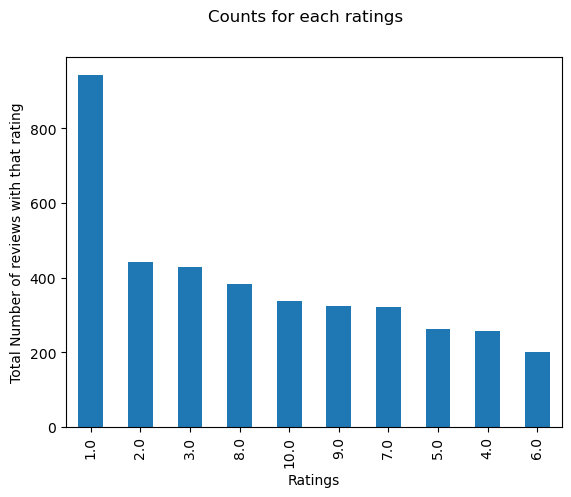

In [28]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [29]:
df_rating = pd.DataFrame(df["stars"].value_counts()).reset_index()
df_rating.columns = ["rating", "total_counts"]

In [30]:
df_rating

,rating,total_counts
0,1.0,944
1,2.0,442
2,3.0,429
3,8.0,384
4,10.0,336
5,9.0,324
6,7.0,320
7,5.0,261
8,4.0,257
9,6.0,201


In [31]:
pct_values = (df_rating['total_counts'].values / df_rating['total_counts'].sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_rating['pct_values'] = pct_values

In [32]:
df_rating

,rating,total_counts,pct_values
0,1.0,944,24.22
1,2.0,442,11.34
2,3.0,429,11.01
3,8.0,384,9.85
4,10.0,336,8.62
5,9.0,324,8.31
6,7.0,320,8.21
7,5.0,261,6.70
8,4.0,257,6.59
9,6.0,201,5.16


Text(0.5, 1.0, 'Counts for each ratings')

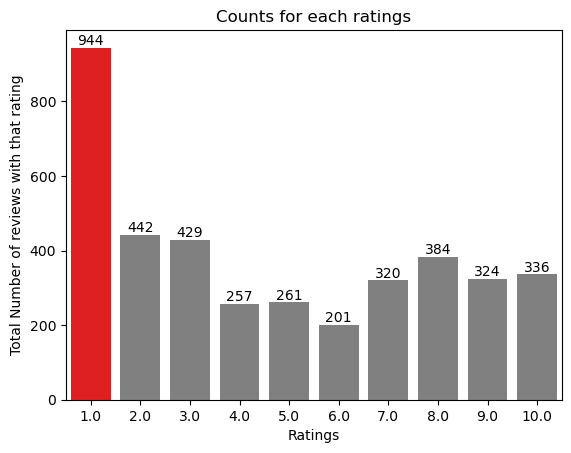

In [33]:
clrs = ['Red' if (x ==  max(df_rating.total_counts)) else 'grey' for x in df_rating.total_counts ]


ax = sns.barplot(x=df_rating.rating, y=df_rating.total_counts, data=df_rating, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [34]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

75 unique countries


In [35]:
df_country_review = pd.DataFrame(df.country.value_counts().head(10)).reset_index()

In [36]:
df_country_review.rename(columns={'country':'country','count':'total_reviews'}, inplace=True)

In [37]:
df_country_review

,country,total_reviews
0,United Kingdom,2439
1,United States,449
2,Australia,164
3,Canada,125
4,Germany,68
5,South Africa,42
6,Ireland,42
7,Switzerland,40
8,Netherlands,36
9,Singapore,31


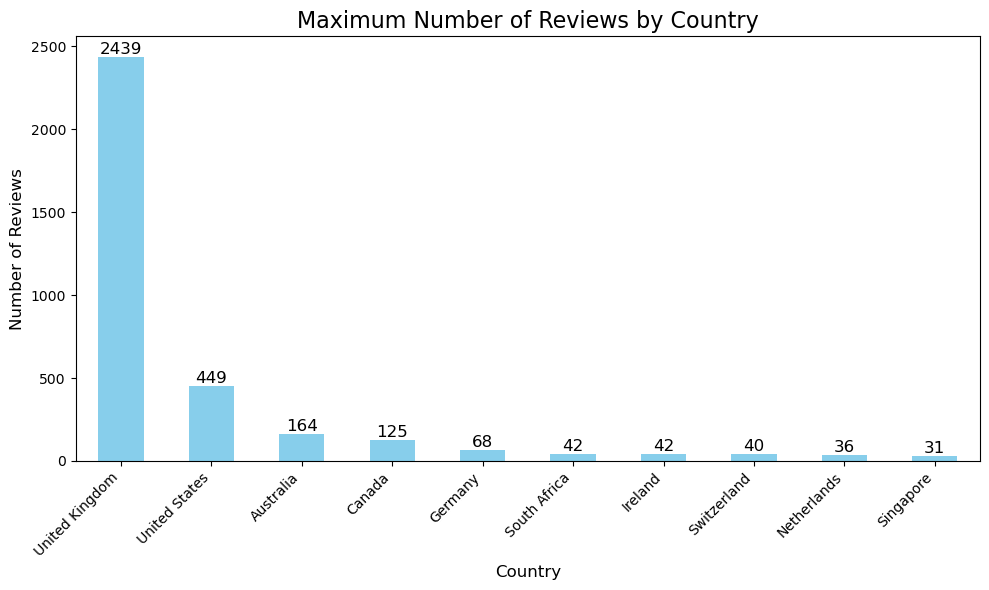

In [38]:
# Assuming df_country_review contains 'country' and corresponding counts
ax = df_country_review.plot(kind="bar", x='country', figsize=(10, 6), legend=False, color='skyblue')

# Annotate bars with counts
for bar in ax.patches:
    count = int(bar.get_height())  # Get bar height (count)
    ax.annotate(
        f'{count}',  # Text to display
        (bar.get_x() + bar.get_width() / 2, count),  # Position
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Customize chart appearance
plt.title("Maximum Number of Reviews by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

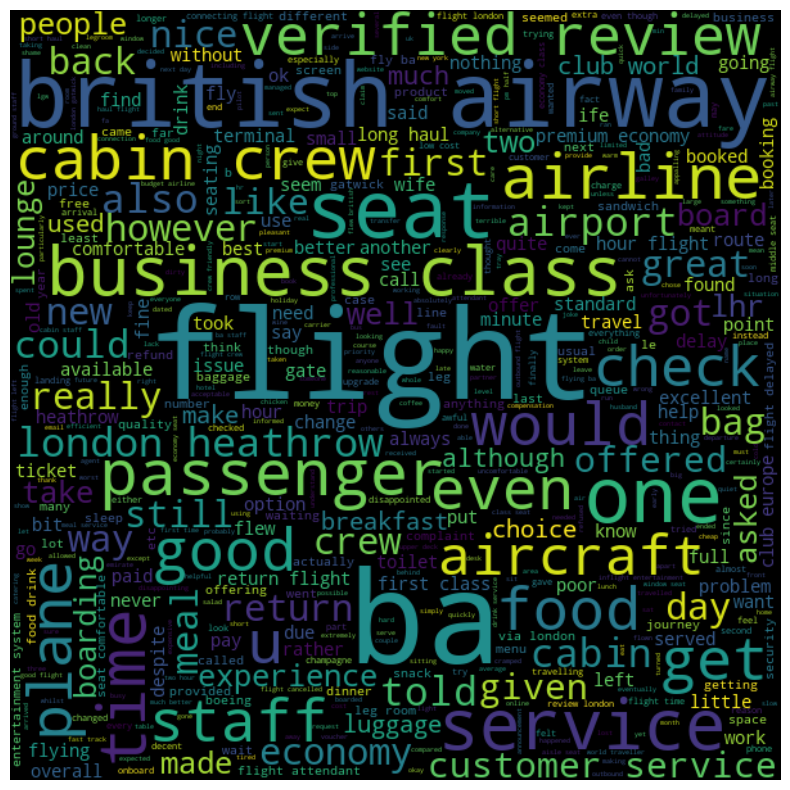

In [39]:

# Start with one review:
reviews = " ".join(df.Corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 499.5, 499.5, -0.5)

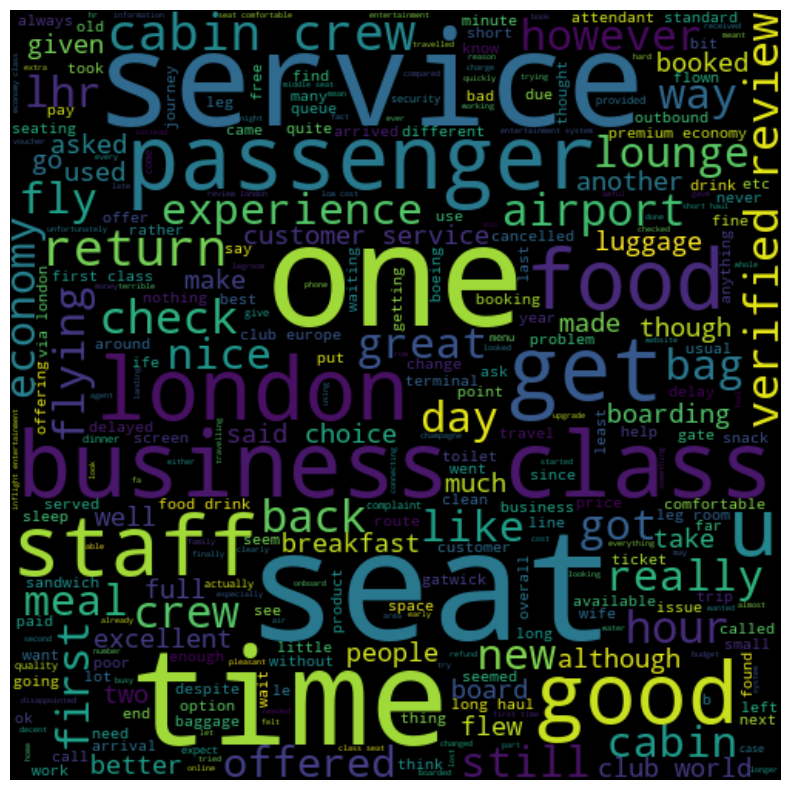

In [40]:
plt.figure(figsize=(20,10))

stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [41]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

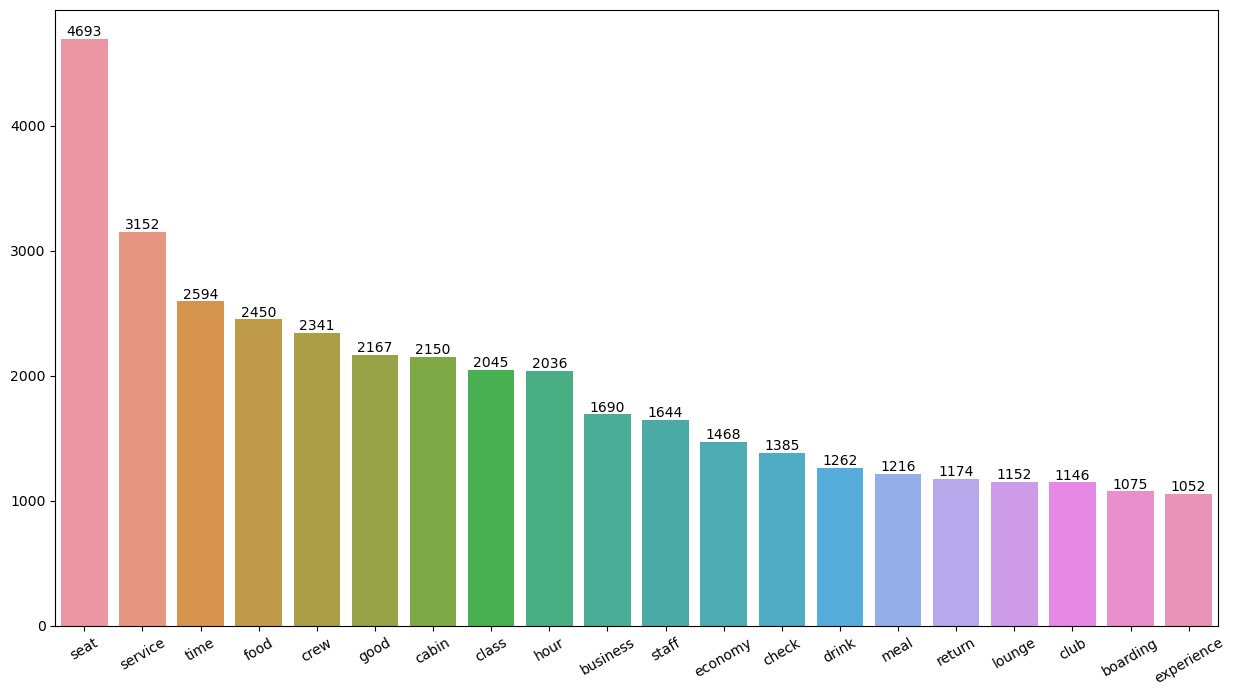

In [42]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

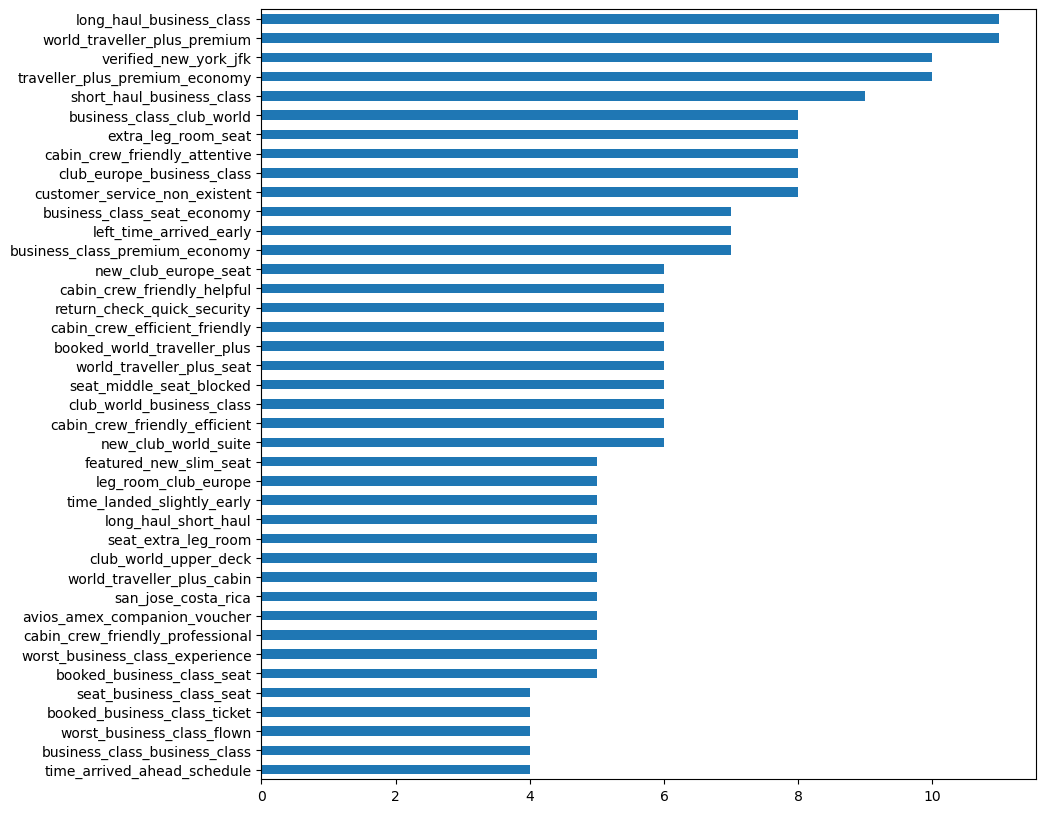

In [43]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.Corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [44]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

In [45]:
reviews_1_3 = " ".join(ratings_1_3.Corpus)
reviews_4_6 = " ".join(ratings_4_6.Corpus)
reviews_7_10 = " ".join(ratings_7_10.Corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


<Axes: >

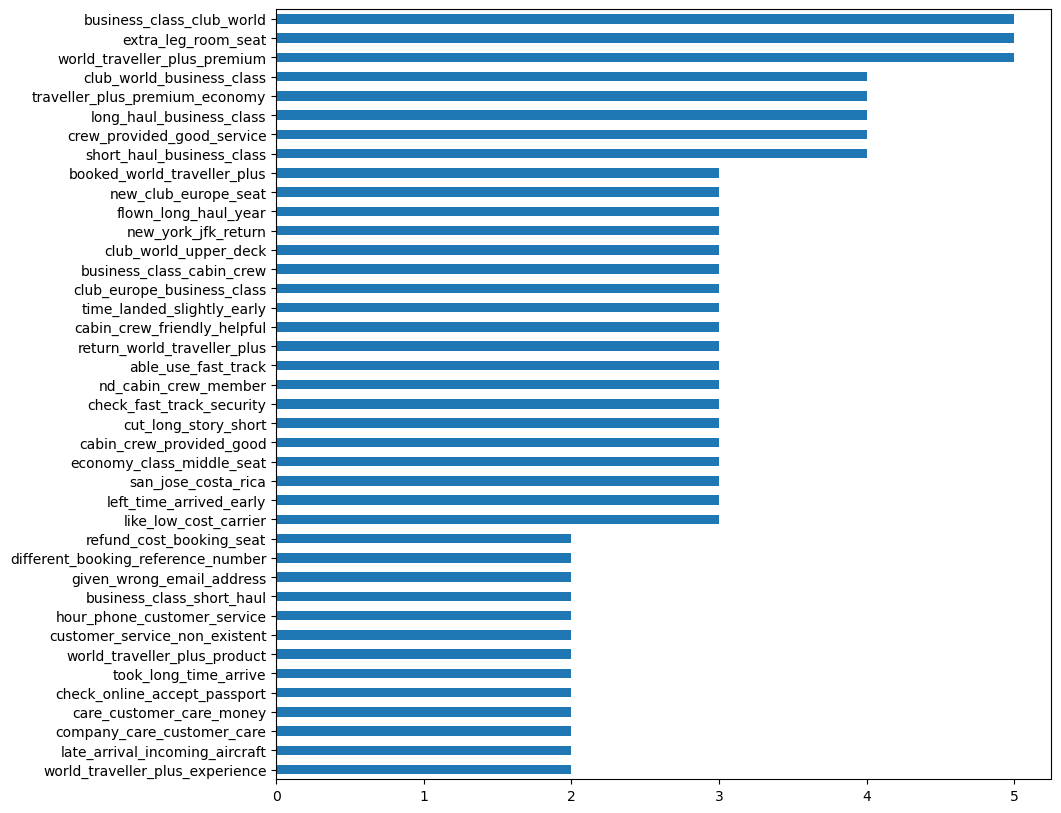

In [46]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

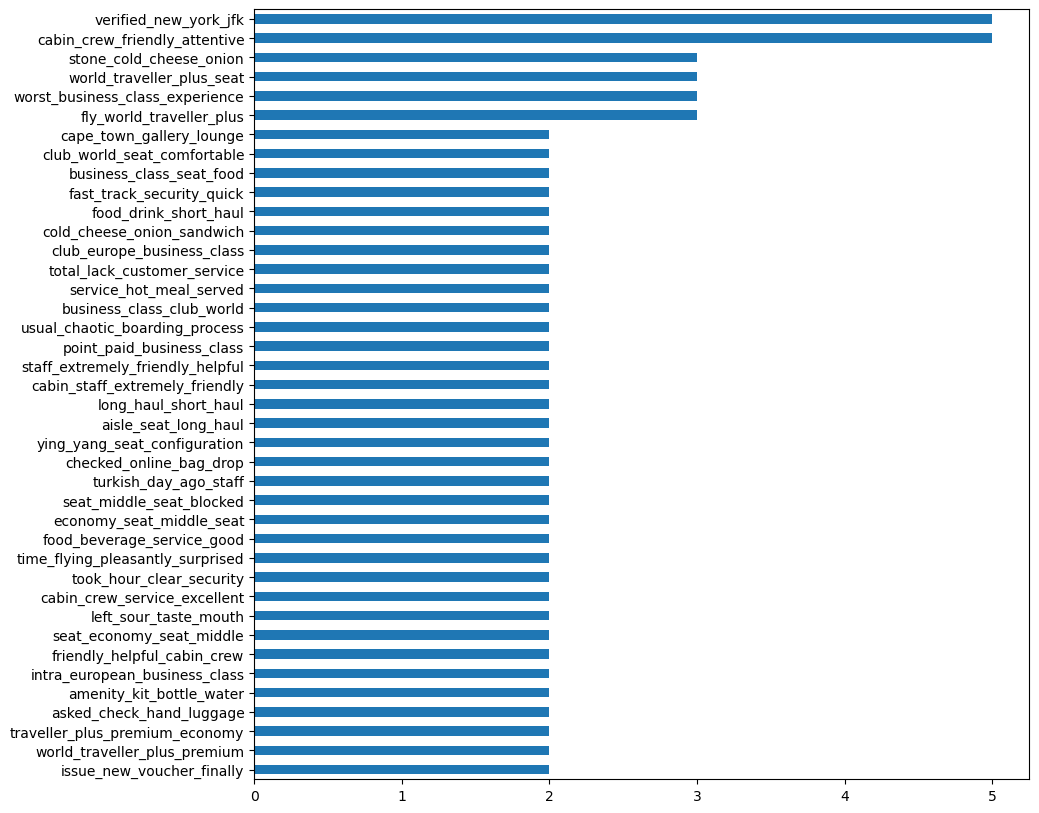

In [47]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

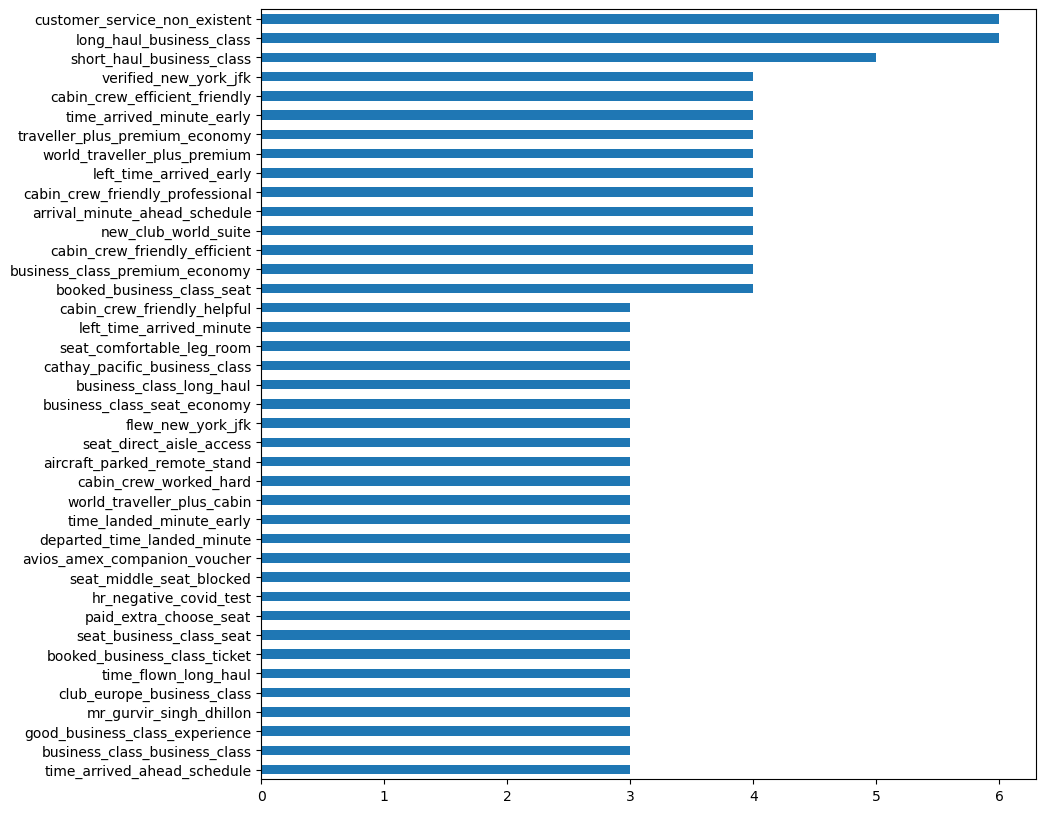

In [48]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

# Function to calculate sentiment label
def get_sentiment_label(text):
    score = vds.polarity_scores(text)['compound']
    if score > 0.2:
        return "Positive"  # Positive sentiment
    elif score < 0:
        return "Negative"  # Negative sentiment
    else:
        return "Neutral"  # Neutral sentiment

# Apply the function to the 'Corpus' column
df['label'] = df['reviews'].apply(get_sentiment_label)

print(df[['reviews', 'label']])

                                                reviews     label
0     ✅ Trip Verified |   On a recent flight from Cy...  Negative
1     ✅ Trip Verified |   Flight BA 0560 arrived in ...  Negative
2     ✅ Trip Verified |   This was the first time I ...  Negative
3     ✅ Trip Verified |   Pretty good flight but sti...  Positive
4     ✅ Trip Verified | Check in was fine, but no pr...  Positive
...                                                 ...       ...
3898  LHR-JFK-LAX-LHR. Check in was ok apart from be...  Negative
3899  LHR to HAM. Purser addresses all club passenge...  Positive
3900  My son who had worked for British Airways urge...  Positive
3901  London City-New York JFK via Shannon on A318 b...  Positive
3902  SIN-LHR BA12 B747-436 First Class. Old aircraf...  Positive

[3903 rows x 2 columns]


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation on the Corpus
tf = vect.fit_transform(df.Corpus)
tf_feature_names = vect.get_feature_names_out()

# Declare the number of topics
number_of_topics = 8
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# Fit the term-frequency data to the LDA model
model.fit(tf)

# Create a dictionary to store topic words and weights
topic_dict = {}

# Loop through model components (topics)
for topic_idx, topic in enumerate(model.components_):
    # Extract top 10 words and their corresponding weights for each topic
    words = [tf_feature_names[i] for i in topic.argsort()[:-11:-1]]
    
    # Store in the dictionary
    topic_dict[f"Topic {topic_idx} words"] = words

# Convert the dictionary into a DataFrame
df_topic = pd.DataFrame(topic_dict)

In [51]:
df_topic

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 3 words,Topic 4 words,Topic 5 words,Topic 6 words,Topic 7 words
0,seat,seat,airline,class,flight,flight,flight,flight
1,ba,flight,ba,ba,ba,ba,ba,good
2,class,airway,british,first,hour,seat,customer,seat
3,business,british,airway,business,london,service,service,crew
4,get,class,service,london,time,food,voucher,food
5,flight,business,review,food,check,crew,airway,cabin
6,economy,ba,flight,service,day,cabin,british,time
7,cabin,customer,verified,airway,bag,meal,staff,service
8,aisle,get,london,flight,airport,economy,new,comfortable
9,club,service,cost,british,staff,time,even,ba
